## Problem 1:

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

Data Ingestion: 12 marks
1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it. (5 Marks)
2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

Data Preparation: 5 marks
1. Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (5 Marks)

Modelling: 26 marks
1. Apply Logistic Regression and LDA (linear discriminant analysis). (5 marks)
2. Apply KNN Model and Naïve Bayes Model. Interpret the results. (7 marks)
3. Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting. (7 marks)
4. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)


Inference: 5 marks
1. Based on these predictions, what are the insights? (5 marks)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
df= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [6]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [8]:
dups=df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [9]:
df.shape

(1525, 9)

In [10]:
print("the total no of rows = ",df.shape[0]," ", "the total no of colums = ",df.shape[1])

the total no of rows =  1525   the total no of colums =  9


In [11]:
df.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [12]:
for feature in df.columns:
    if df[feature].dtype=='object':
           print(feature.upper() ," ",df[feature].nunique())
           print(df[feature].value_counts().sort_values())
            

VOTE   2
Conservative     462
Labour          1063
Name: vote, dtype: int64
GENDER   2
male      713
female    812
Name: gender, dtype: int64


In [13]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

# Univariate Analysis

Text(0.5, 1.0, 'Blair boxplot')

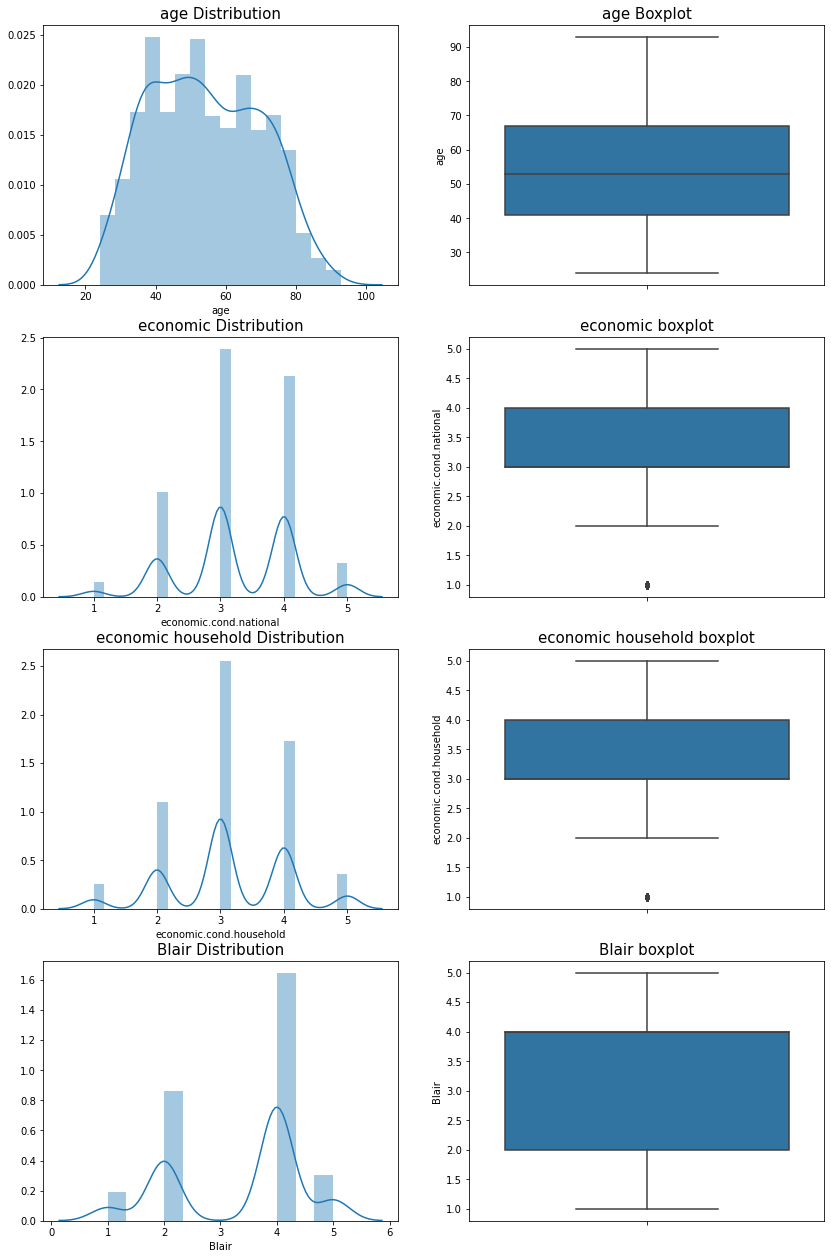

In [14]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(14,22)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=15)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=15)

a=sns.distplot(df['economic.cond.national'], ax=axes[1][0])
a.set_title("economic Distribution",fontsize=15)

a=sns.boxplot(df['economic.cond.national'],orient="v", ax=axes[1][1])
a.set_title("economic boxplot", fontsize=15)

a=sns.distplot(df['economic.cond.household'], ax=axes[2][0])
a.set_title("economic household Distribution",fontsize=15)

a=sns.boxplot(df['economic.cond.household'],orient="v", ax=axes[2][1])
a.set_title("economic household boxplot", fontsize=15)

a=sns.distplot(df['Blair'], ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=15)

a=sns.boxplot(df['Blair'],orient="v", ax=axes[3][1])
a.set_title("Blair boxplot", fontsize=15)

Text(0.5, 1.0, 'political knowledge boxplot')

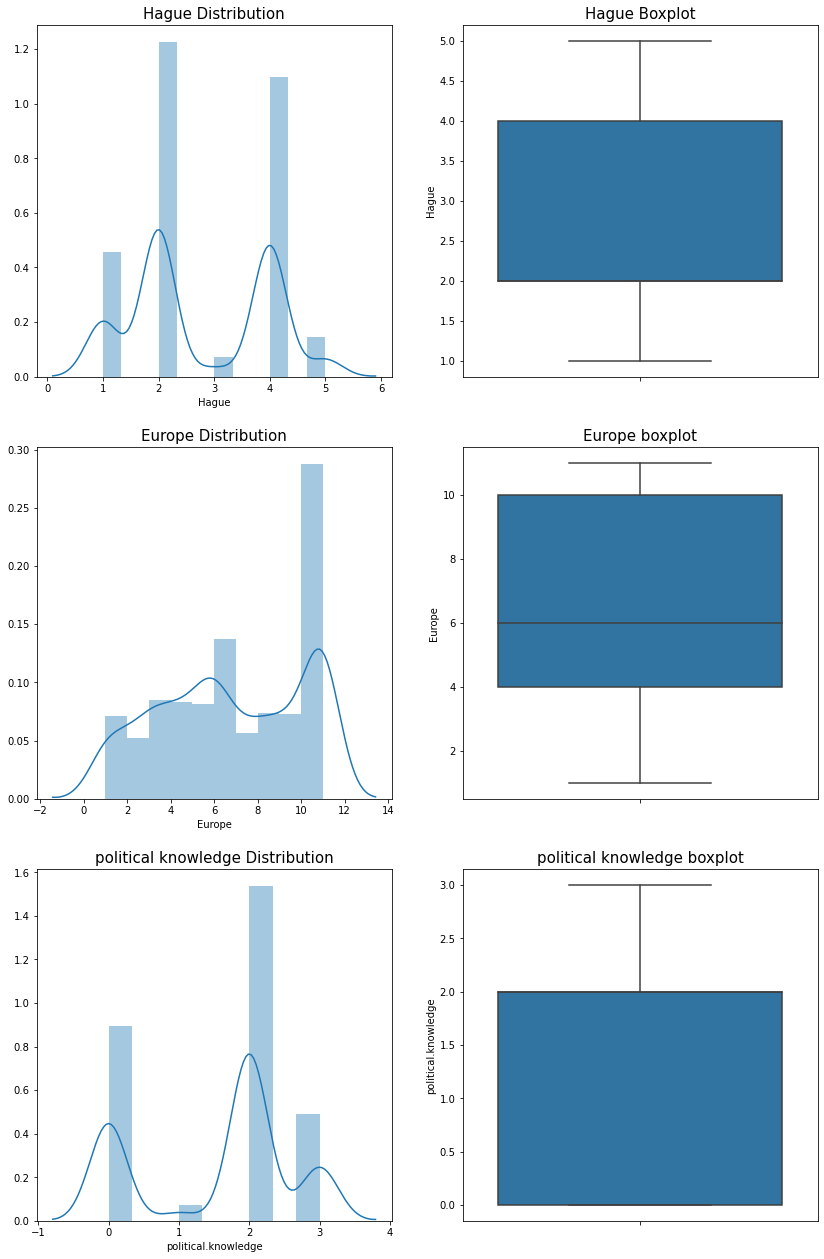

In [15]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(14,22)
a = sns.distplot(df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=15)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=15)

a=sns.distplot(df['Europe'], ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=15)

a=sns.boxplot(df['Europe'],orient="v", ax=axes[1][1])
a.set_title("Europe boxplot", fontsize=15)

a=sns.distplot(df['political.knowledge'], ax=axes[2][0])
a.set_title("political knowledge Distribution",fontsize=15)

a=sns.boxplot(df['political.knowledge'],orient="v", ax=axes[2][1])
a.set_title("political knowledge boxplot", fontsize=15)

In [16]:
df.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

# Bivariate and Multivariate Analysis

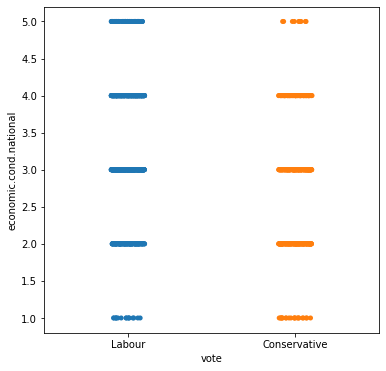

In [17]:
plt.figure(figsize=(6,6))
sns.stripplot(df["vote"], df['economic.cond.national'], jitter=True) 
plt.show()

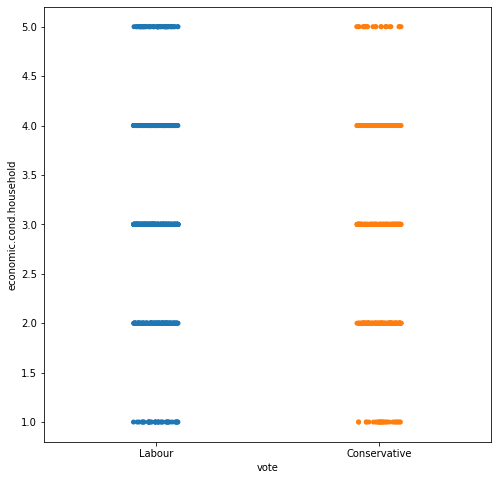

In [18]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['economic.cond.household'], jitter=True) 
plt.show()

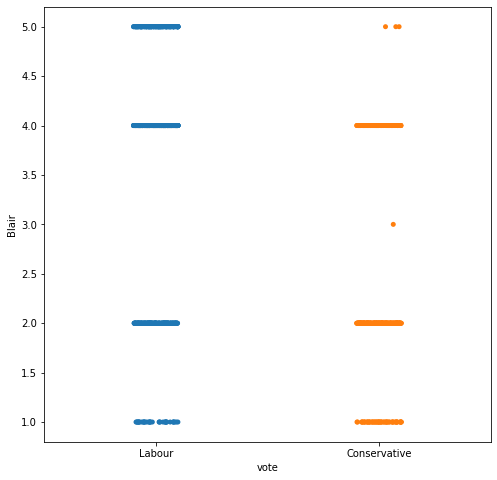

In [19]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Blair'], jitter=True) 
plt.show()

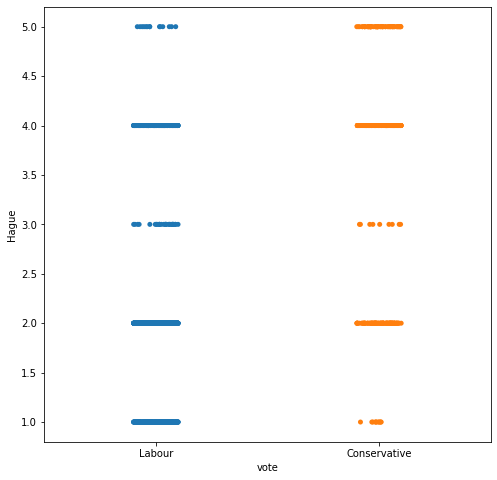

In [20]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Hague'], jitter=True) 
plt.show()

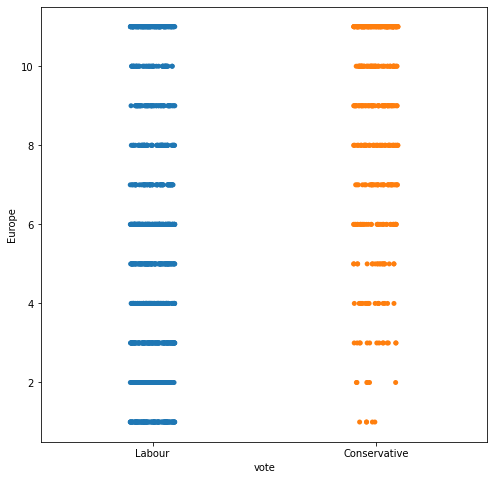

In [21]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Europe'], jitter=True) 
plt.show()

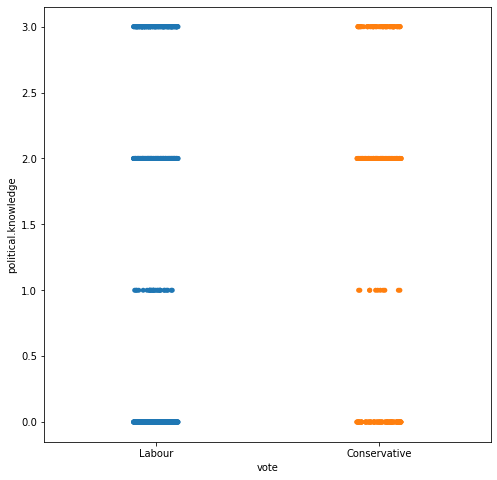

In [22]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['political.knowledge'], jitter=True) 
plt.show()

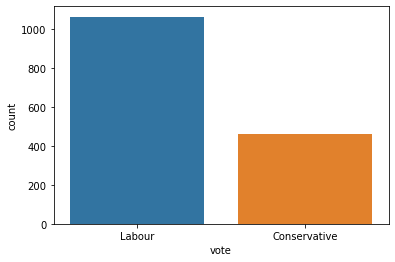

In [23]:
sns.countplot(df['vote'], order = ['Labour', 'Conservative'])

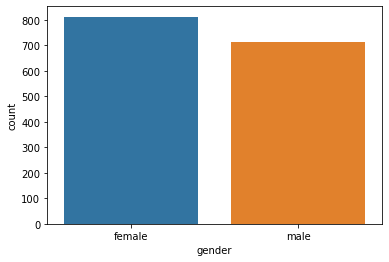

In [24]:
sns.countplot(df['gender'], order = ['female', 'male'])

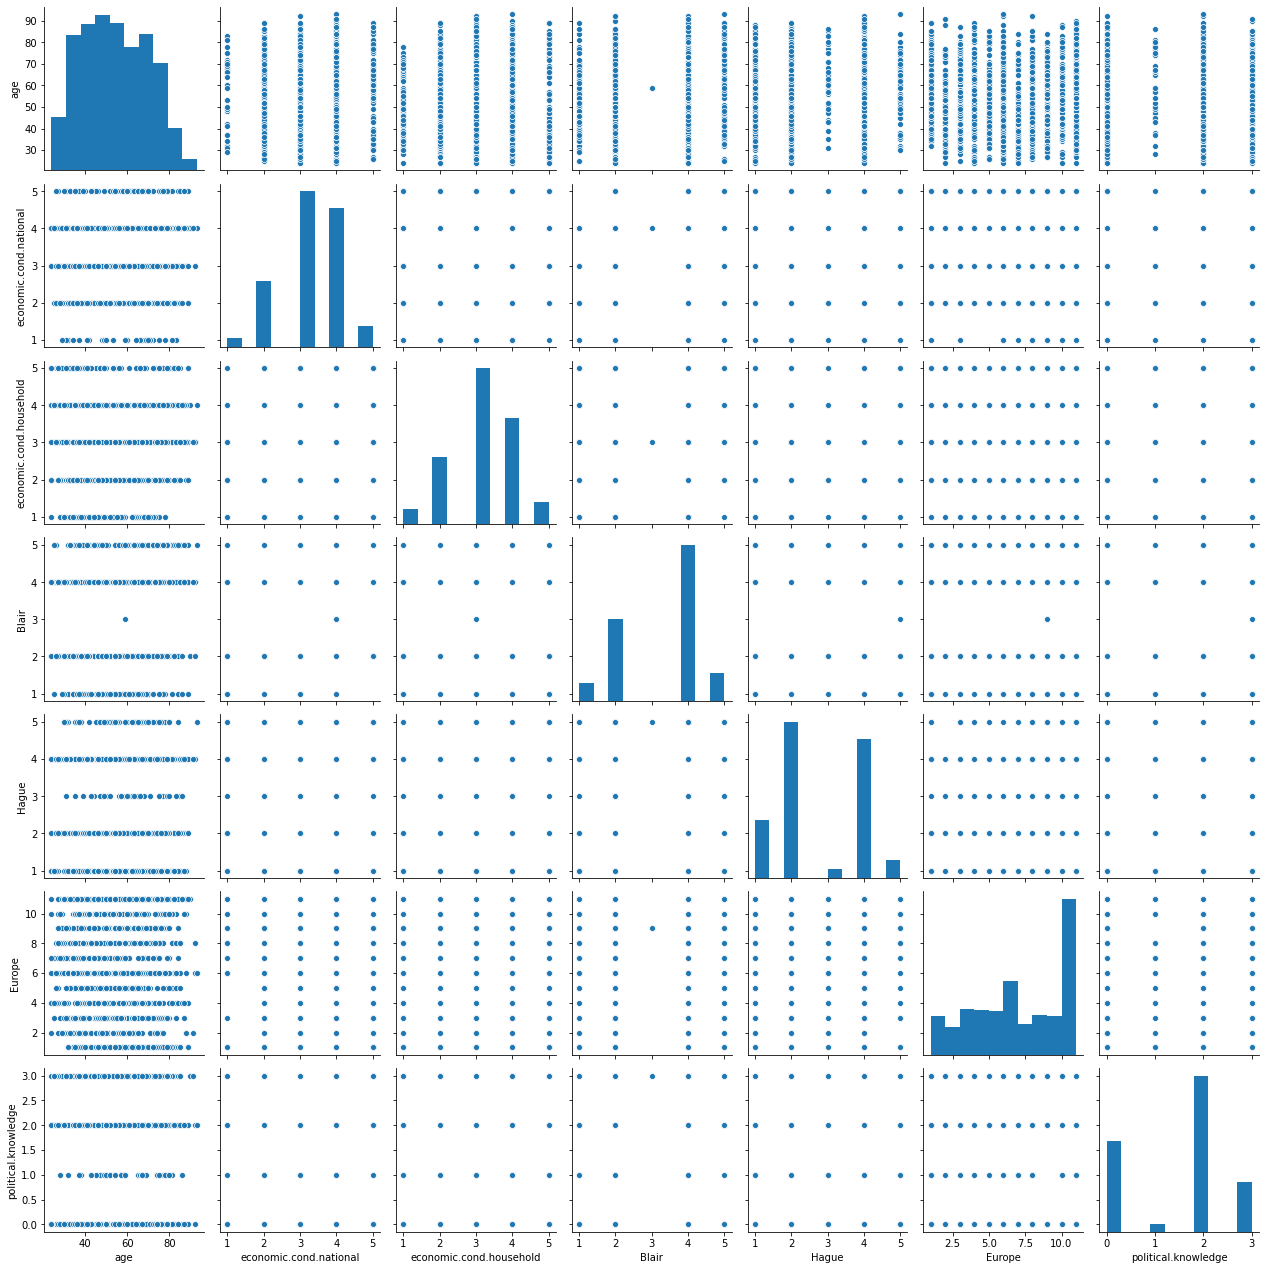

In [25]:
sns.pairplot(df)

D:\PYTHON\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\PYTHON\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


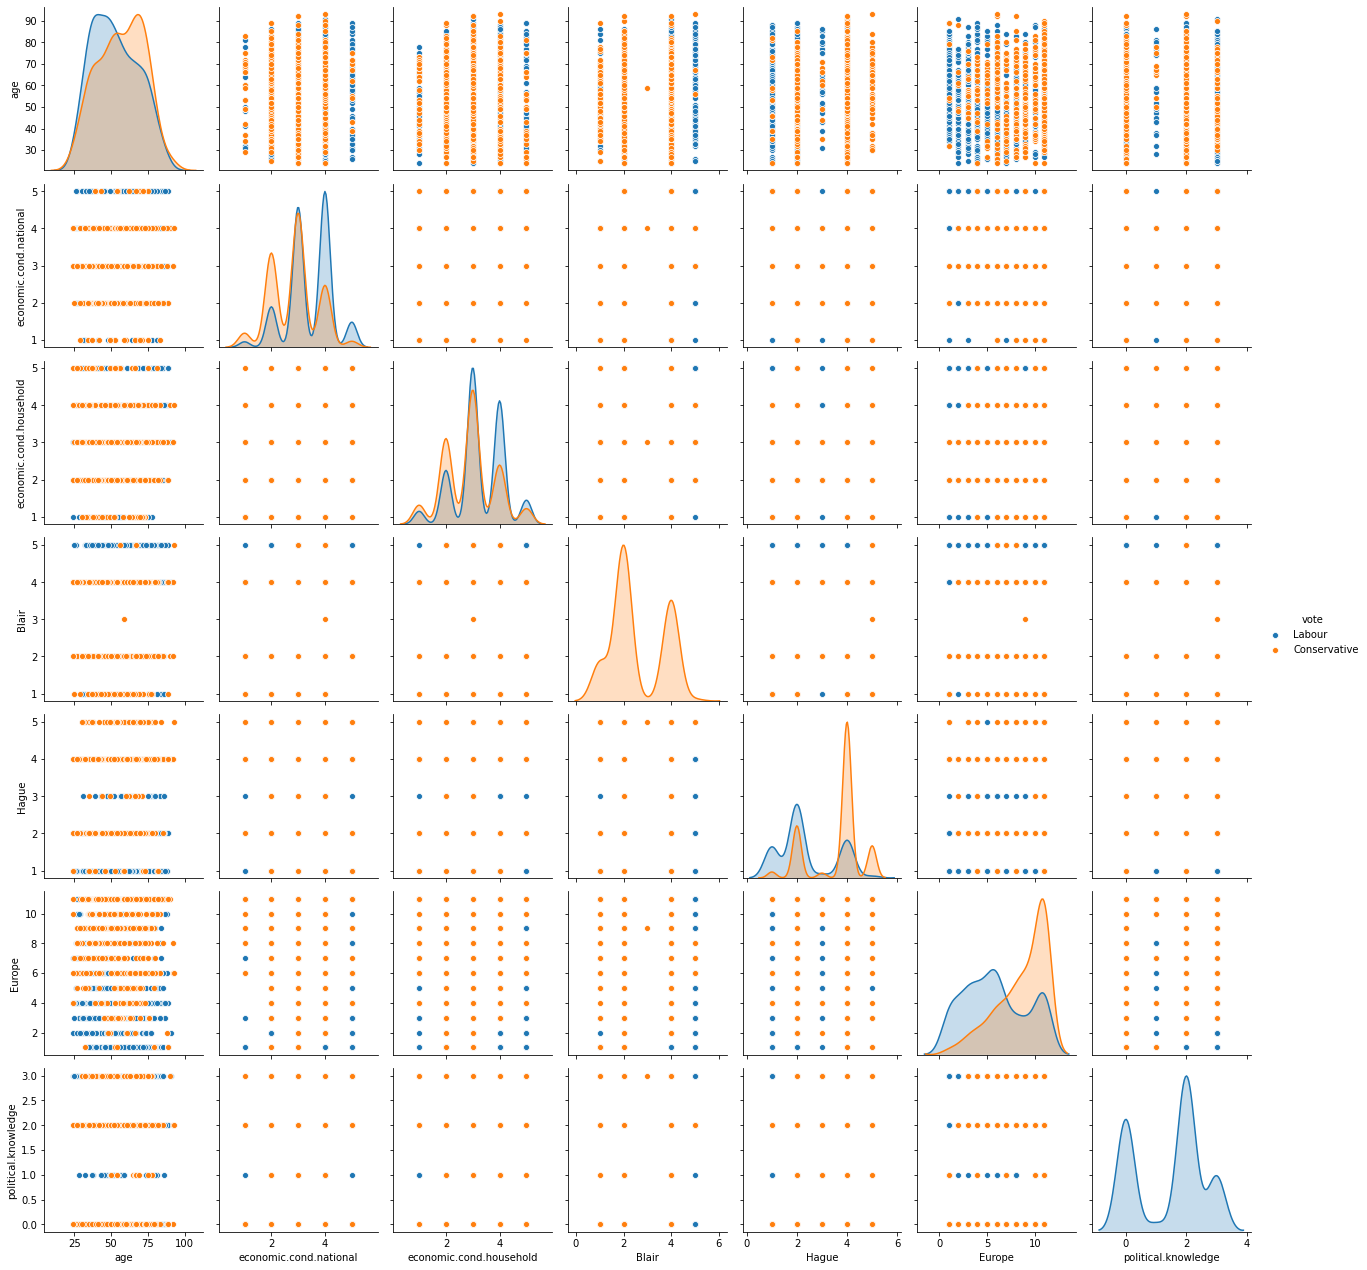

In [26]:
sns.pairplot(df, hue='vote')

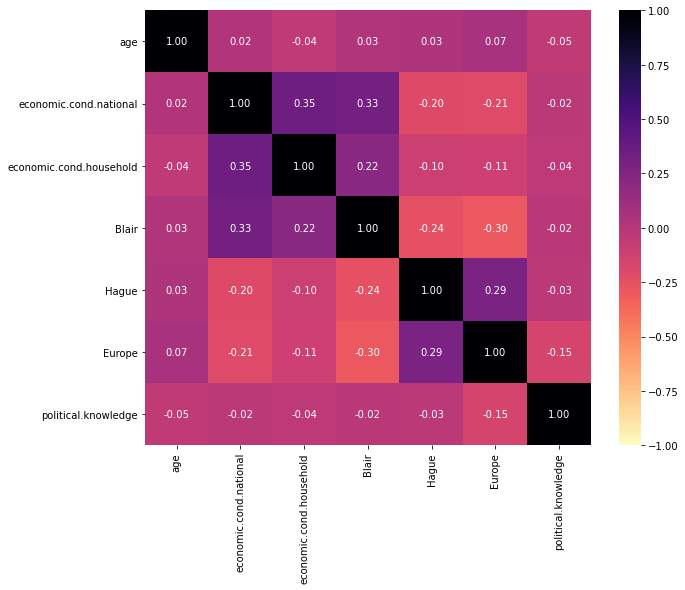

In [27]:
df_cor = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_cor, annot=True, vmin='-1', vmax='1', fmt = '.2f', cmap='magma_r')

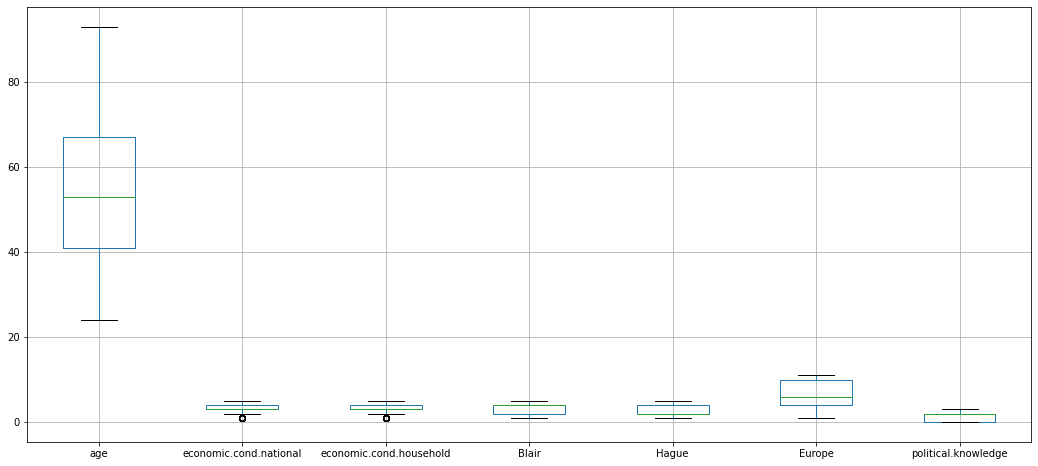

In [28]:
plt.figure(figsize=(18,8))
df.boxplot()
plt.show()

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [30]:
df3=df.copy()

In [31]:
cat1 = ['vote', 'gender']
            

In [32]:
df2 =pd.get_dummies(df, columns=cat1,drop_first=True)

In [33]:
df2.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [34]:
df2= df2.rename(columns={'vote_Labour':'IsLabour_or_not' ,'gender_male':'IsMale_or_not'},inplace= False)

In [35]:
df2.sample(10)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsLabour_or_not,IsMale_or_not
33,62,4,3,4,2,1,2,1,1
562,37,4,2,4,2,8,1,1,1
609,84,4,2,4,1,4,3,1,0
1449,47,4,4,4,2,5,0,1,0
1361,30,3,4,4,4,11,0,1,1
227,33,3,3,4,4,5,2,1,0
1339,34,4,5,4,1,6,0,1,0
146,69,3,2,4,2,8,2,1,0
611,55,3,3,4,2,11,2,1,0
582,39,3,3,1,4,11,2,0,0


# Naive Bayes

In [36]:
X=df2.drop('IsLabour_or_not',axis=1)
Y=df2['IsLabour_or_not']

In [37]:
X.shape

(1525, 8)

In [38]:
Y.shape

(1525,)

In [39]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [40]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: IsLabour_or_not, dtype: uint8

In [41]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.30, random_state=1)

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


In [43]:
NB_model=GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

In [44]:
Y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train,Y_train_predict))

print(metrics.classification_report(Y_train,Y_train_predict))

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



the auc 0.886 


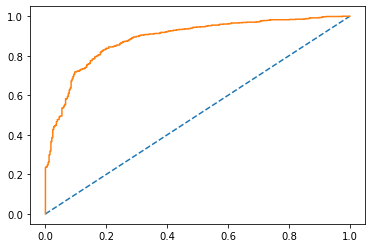

In [45]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);


In [46]:
Y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test,Y_test_predict))

print(metrics.classification_report(Y_test,Y_test_predict))

0.8253275109170306
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



the auc curve 0.885 


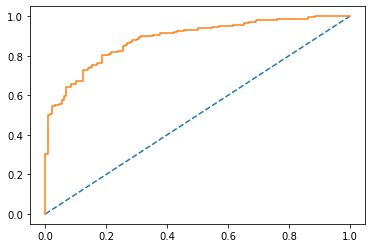

In [47]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)



# KNN

In [48]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [49]:
from scipy.stats import zscore

In [50]:
X[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']]=X[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']].apply(zscore)

In [51]:
X.head(10)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169
5,-0.457295,-0.279218,0.924730,0.566716,1.018544,-0.827714,0.422643,1.067169
6,0.179402,-1.414704,-1.226625,0.566716,1.018544,1.295778,0.422643,1.067169
7,1.452797,-0.279218,0.924730,0.566716,-1.419886,-1.737782,-1.424148,1.067169
8,-0.966652,-0.279218,-0.150948,0.566716,1.018544,1.295778,-1.424148,-0.937059
9,1.007109,-0.279218,-1.226625,1.418187,-1.419886,1.295778,0.422643,1.067169


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=1)

In [53]:

from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [54]:
Y_train_predict=KNN_model.predict(X_train)
KNN_model_score=KNN_model.score(X_train,Y_train)

In [55]:
print(KNN_model_score)

0.8631677600749765


In [56]:
print(metrics.confusion_matrix(Y_train,Y_train_predict))
print(metrics.classification_report(Y_train,Y_train_predict))

[[248  84]
 [ 62 673]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



# AUC ROC Curve KNN Train

the auc 0.932 


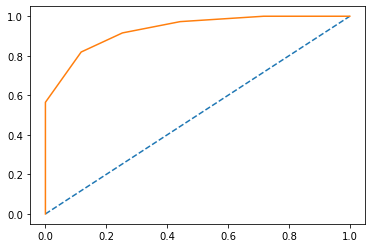

In [57]:
probs_train=KNN_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);


In [58]:
y_test_predict=KNN_model.predict(X_train)

KNN_model_score=KNN_model.score(X_train, Y_train)

print(KNN_model_score)


0.8631677600749765


In [59]:
print(metrics.confusion_matrix(Y_train,Y_train_predict))
print(metrics.classification_report(Y_train,Y_train_predict))

[[248  84]
 [ 62 673]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



# AUC ROC Curve KNN Test

the auc curve 0.870 


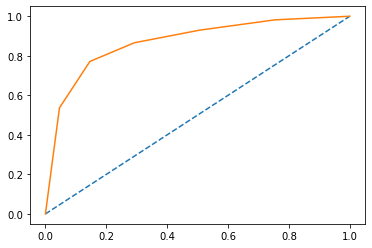

In [60]:

probs_test=KNN_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)



In [158]:

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [159]:
y_train_predict=KNN_model.predict(X_train)
KNN_model_score=KNN_model.score(X_train,Y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(Y_train,Y_train_predict))
print(metrics.classification_report(Y_train,Y_train_predict))

0.8500468603561387
[[248  84]
 [ 62 673]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



the auc curve 0.898 


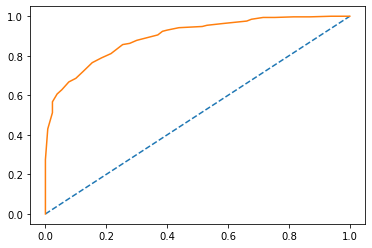

In [160]:
probs_train=knn.predict_proba(X_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc curve %.3f " % auc)

train_fpr,train_tpr,train_threshold=roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [161]:
y_test_predict=KNN_model.predict(X_test)
KNN_model_score=KNN_model.score(X_test,Y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(Y_test,Y_test_predict))
print(metrics.classification_report(Y_test,Y_test_predict))


0.8296943231441049
[[ 92  38]
 [ 40 288]]
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



the auc curve 0.895 


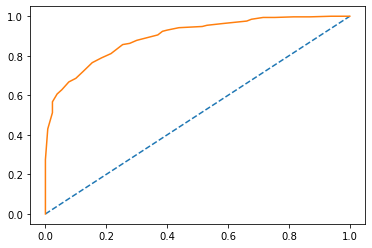

In [162]:
probs_test=knn.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


In [64]:

KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [65]:
y_train_predict=KNN_model.predict(X_train)
KNN_model_score=KNN_model.score(X_train,Y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(Y_train,Y_train_predict))
print(metrics.classification_report(Y_train,Y_train_predict))

0.8631677600749765
[[248  84]
 [ 62 673]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



In [66]:
Y_test_predict=KNN_model.predict(X_test)
KNN_model_score=KNN_model.score(X_test,Y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(Y_test,Y_test_predict))
print(metrics.classification_report(Y_test,Y_test_predict))

0.8209606986899564
[[ 92  38]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.78       458
weighted avg       0.82      0.82      0.82       458



In [67]:
ac_score=[]

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    scores=knn.score(X_test,Y_test)
    ac_score.append(scores)
    
MCE=[1-X for X in ac_score]
MCE

[0.22925764192139741,
 0.19213973799126638,
 0.17903930131004364,
 0.17030567685589515,
 0.18122270742358082,
 0.1834061135371179,
 0.18122270742358082,
 0.18558951965065507,
 0.16812227074235808,
 0.16812227074235808]

# AUC ROC curve after n classifier for train data set

the auc curve 0.902 


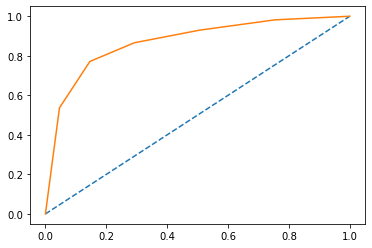

In [68]:

probs_train=knn.predict_proba(X_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc curve %.3f " % auc)

train_fpr,train_tpr,train_threshold=roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)



# AUC ROC curve after n classifier for test data set

the auc curve 0.897 


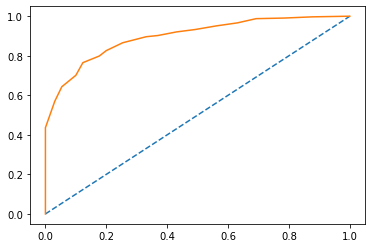

In [69]:

probs_test=knn.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)



Minimum error:- 0.16812227074235808 at K = 16


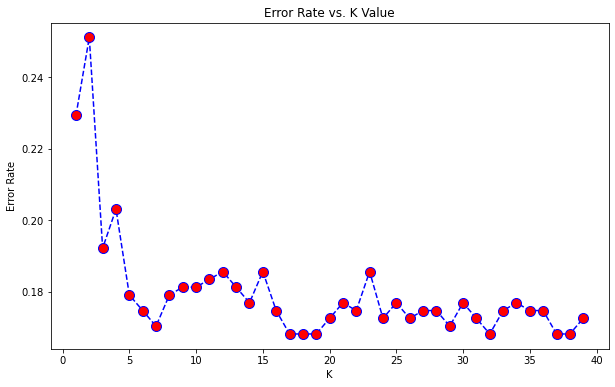

In [106]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8318777292576419 at K = 16


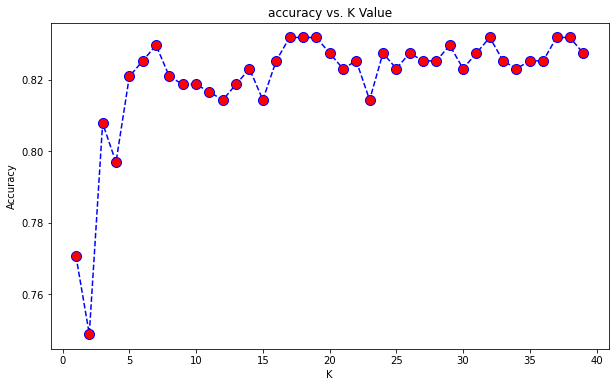

In [105]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [146]:
KNN_model=KNeighborsClassifier(n_neighbors=16)
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=16)

In [154]:
y_train_predict=KNN_model.predict(X_train)
KNN_model_score=KNN_model.score(X_train,Y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(Y_train,Y_train_predict))
print(metrics.classification_report(Y_train,Y_train_predict))

0.8500468603561387
[[248  84]
 [ 62 673]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



the auc curve 0.898 


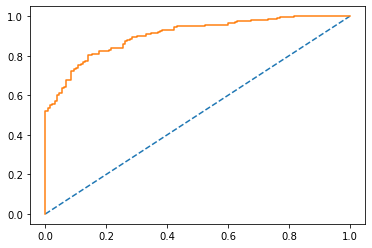

In [155]:
probs_train=knn.predict_proba(X_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc curve %.3f " % auc)

train_fpr,train_tpr,train_threshold=roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)



In [156]:
Y_test_predict=KNN_model.predict(X_test)
KNN_model_score=KNN_model.score(X_test,Y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(Y_test,Y_test_predict))
print(metrics.classification_report(Y_test,Y_test_predict))

0.8296943231441049
[[ 92  38]
 [ 40 288]]
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



the auc curve 0.895 


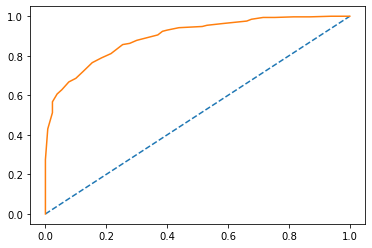

In [157]:
probs_test=knn.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


# Discriminant Analysis

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [72]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [73]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,Y_train)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8369259606373008
[[233  99]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



# AUC ROC curve for LDA  Train

the auc 0.889 


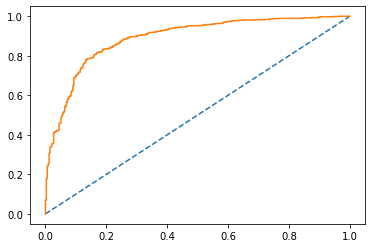

In [74]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);



In [75]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,Y_test)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



# AUC ROC curve for LDA  Test

the auc curve 0.884 


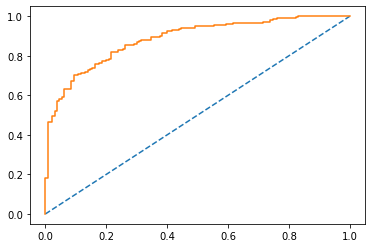

In [76]:

probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)




# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression


In [78]:
#Logistic_model=LogisticRegression()
#Logistic_model.fit(X_train,Y_train)

In [79]:
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [80]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,Y_train)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8406747891283973
[[230 102]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [81]:
y_train_prob=Logistic_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.616214,0.383786
1,0.186460,0.813540
2,0.187994,0.812006
3,0.163937,0.836063
4,0.052483,0.947517


In [82]:
Logistic_model.score(X_train,Y_train)

0.8406747891283973

# AUC ROC curve for Logistic Regression Train

AUC: 0.889


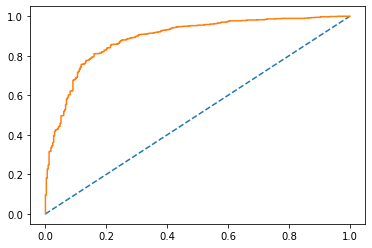

In [83]:
# predict probabilities
probs = Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [84]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,Y_test)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8231441048034934
[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [85]:
y_test_prob=Logistic_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.933648,0.066352
1,0.689193,0.310807
2,0.333480,0.666520
3,0.477407,0.522593
4,0.157152,0.842848


# AUC ROC curve for Logistic Regression Test

AUC: 0.882


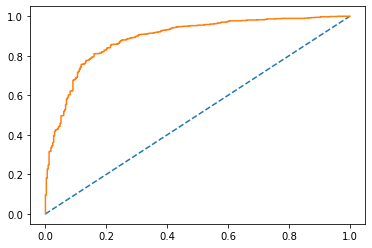

In [86]:

probs_test = Logistic_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

# Model tuning

# Bagging Train

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=1)

In [88]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


In [89]:
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100, random_state=1)

Bagging_model.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [90]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,Y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



# AUC _ROC  Curve Bagging Train

AUC: 1.000


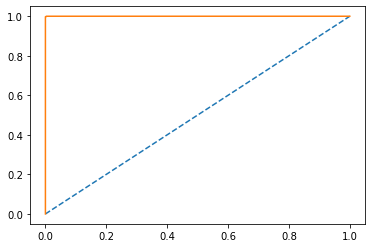

In [91]:

probs = Bagging_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

# Bagging Test

In [92]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,Y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.7969432314410481
[[ 84  46]
 [ 47 281]]
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       130
           1       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



# AUC _ROC  Curve Bagging Test

AUC: 0.877


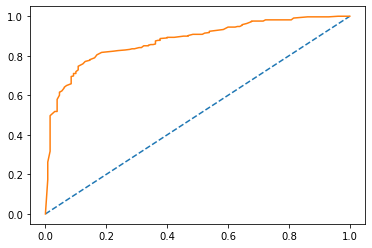

In [93]:

probs_test = Bagging_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

# Boosting Train

# Ada Boost

In [94]:
from sklearn.ensemble import AdaBoostClassifier

In [95]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [96]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,Y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



AUC: 0.913


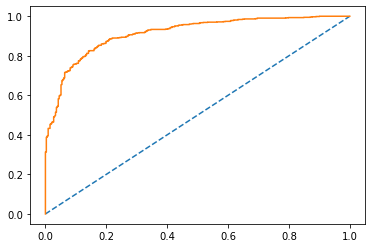

In [97]:

probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [137]:
ADB_model.feature_importances_

array([0.69, 0.04, 0.03, 0.06, 0.08, 0.07, 0.02, 0.01])

In [138]:
X.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'IsMale_or_not'],
      dtype='object')

# Gradient Boosting

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=2)
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=2)

In [99]:

y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, Y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, y_train_predict))

0.8865979381443299
[[248  84]
 [ 62 673]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



# AUC _ROC  Curve Boosting Train

AUC: 0.950


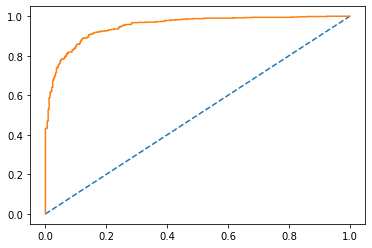

In [100]:

probs = gbc_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

# ADA Boosting Test

In [101]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, Y_test)
print(ADB_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8187772925764192
[[ 92  38]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.78       458
weighted avg       0.82      0.82      0.82       458



# AUC _ROC  Curve Boosting Test

AUC: 0.879


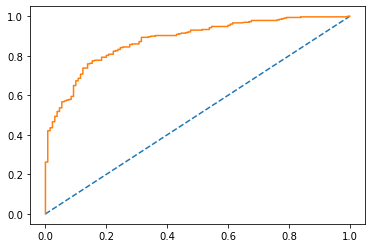

In [102]:
probs_test = ADB_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

In [144]:
# Variable Importance
print (pd.DataFrame(ADB_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                          Imp
age                      0.69
Hague                    0.08
Europe                   0.07
Blair                    0.06
economic.cond.national   0.04
economic.cond.household  0.03
political.knowledge      0.02
IsMale_or_not            0.01


# Gradient Boosting Test

In [103]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, Y_test)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8318777292576419
[[ 92  38]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.78       458
weighted avg       0.82      0.82      0.82       458



# Gradient Boosting AUC_ROC Curve Test

AUC: 0.904


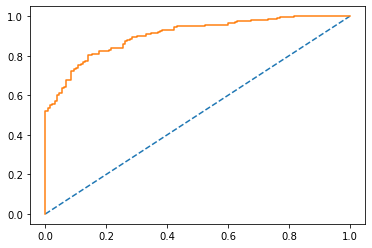

In [104]:

probs_test = gbc_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

In [141]:
# Variable Importance
print (pd.DataFrame(gbc_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                              Imp
Hague                    0.346437
Europe                   0.192138
Blair                    0.183314
political.knowledge      0.108228
age                      0.105731
economic.cond.national   0.038109
economic.cond.household  0.023316
IsMale_or_not            0.002728


## Building a Random Forest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from scipy import stats

In [109]:
param_grid = {
    'max_depth': [6, 7],
    'max_features': [4, 5],
    'min_samples_leaf': [25, 30],
    'min_samples_split': [20, 30], 
    'n_estimators': [101, 301] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [110]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [6, 7], 'max_features': [4, 5],
                         'min_samples_leaf': [25, 30],
                         'min_samples_split': [20, 30],
                         'n_estimators': [101, 301]})

In [111]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 25,
 'min_samples_split': 20,
 'n_estimators': 101}

In [112]:
best_grid = grid_search.best_estimator_

In [113]:
best_grid

RandomForestClassifier(max_depth=6, max_features=5, min_samples_leaf=25,
                       min_samples_split=20, n_estimators=101, random_state=1)

In [115]:
Ytrain_predict = best_grid.predict(X_train)
Ytest_predict = best_grid.predict(X_test)

In [118]:
confusion_matrix(Y_train,Ytrain_predict)

array([[239,  93],
       [ 70, 665]], dtype=int64)

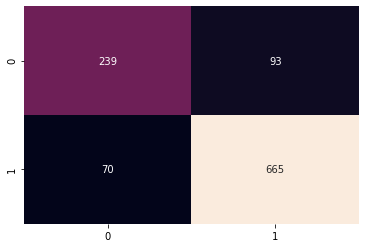

In [119]:
sns.heatmap(confusion_matrix(Y_train,Ytrain_predict),annot=True,fmt='d',cbar=False)

In [120]:
rf_train_acc=best_grid.score(X_train,Y_train) 
rf_train_acc

0.8472352389878163

In [121]:
print(classification_report(Y_train,Ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75       332
           1       0.88      0.90      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [122]:
rf_metrics=classification_report(Y_train, Ytrain_predict,output_dict=True)
df2=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df2.loc["1"][0],2)
rf_train_recall=round(df2.loc["1"][1],2)
rf_train_f1=round(df2.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.88
rf_train_recall  0.9
rf_train_f1  0.89


Area under Curve is 0.9081120399967217


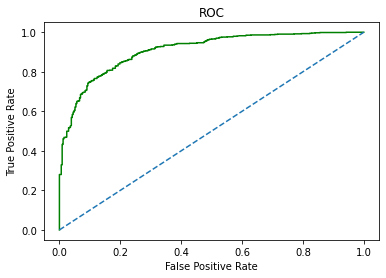

In [124]:
rf_train_fpr, rf_train_tpr,_=roc_curve(Y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(Y_train,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [125]:
confusion_matrix(Y_test,Ytest_predict)

array([[ 86,  44],
       [ 42, 286]], dtype=int64)

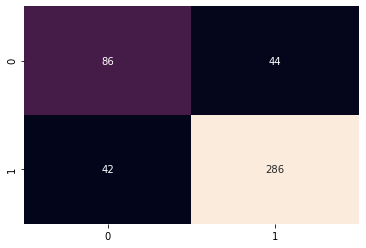

In [126]:
sns.heatmap(confusion_matrix(Y_test,Ytest_predict),annot=True,fmt='d',cbar=False)

In [127]:
rf_test_acc=best_grid.score(X_test,Y_test)
rf_test_acc

0.8122270742358079

In [128]:
print(classification_report(Y_test,Ytest_predict))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67       130
           1       0.87      0.87      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



In [129]:
rf_metrics=classification_report(Y_test, Ytest_predict,output_dict=True)
df2=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df2.loc["1"][0],2)
rf_test_recall=round(df2.loc["1"][1],2)
rf_test_f1=round(df2.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.87
rf_test_recall  0.87
rf_test_f1  0.87


Area under Curve is 0.8887429643527204


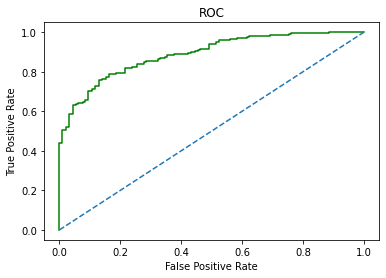

In [131]:
rf_test_fpr, rf_test_tpr,_=roc_curve(Y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(Y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [132]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                              Imp
Hague                    0.385140
Blair                    0.215557
Europe                   0.211974
political.knowledge      0.092636
age                      0.050676
economic.cond.national   0.026052
economic.cond.household  0.014639
IsMale_or_not            0.003326
